In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import skewnorm
from scipy.stats import kurtosis

Assuming normality solely from the appearance of a distribution's histograms can be deceptive—particularly with smaller sample sizes where visual assessments may not be reliable.

Let's examine the distribution in question and its corresponding histogram. 

We'll employ the Seaborn library's **histplot()** function, which conveniently allows us to overlay the probability density function on the histogram—providing a clearer insight into the data's underlying distribution.

In [2]:
data_1 = np.array([ 0.1,  2. ,  2.2, -0.6, -0.8, -0.5, -2.6, -1.6,  0.8,  1.4, -0.1,
       -0.5,  0.1,  1.1,  1.6])

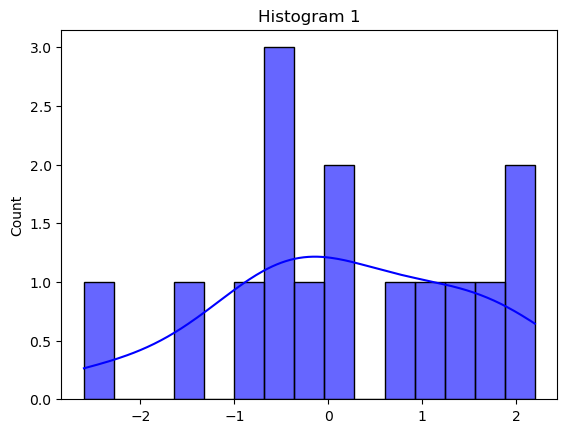

In [3]:
# Plot distribution 1

# Plot the histogram of data_1 using Seaborn
sns.histplot(
    data=data_1,          # The input data to be plotted as a histogram.
    bins=15,              # The number of bins to use in the histogram.
    kde=True,             # A boolean value that determines whether to plot the kernel density estimate curve along with the histogram bars.
    alpha=0.6,            # A value between 0 and 1 that sets the transparency level of the histogram's bars. A smaller value makes the bars more transparent.
    color='b'             # The color of the histogram bars. This can be specified as a color name (e.g. 'red'), a hex code (e.g. '#FF0000'), or an RGB tuple (e.g. (1, 0, 0)).
)

plt.title('Histogram 1')  # Add title

plt.show()

The histogram above doesn't perfectly match the bell-shaped curve typically associated with normal distributions. This might suggest that the dataset isn't normally distributed. To further investigate the data's normality, let's examine the Q-Q plot—an additional method for assessing the normality of a dataset.

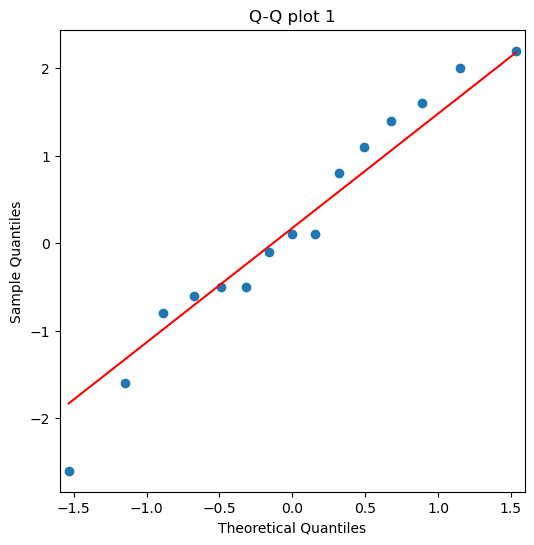

In [4]:
# Create Q-Q plot for data_1
fig, ax = plt.subplots(figsize=(6,6))
sm.qqplot(data_1, line='s', ax=ax, fmt='b')

# Set the chart title and axis labels
ax.set_title("Q-Q plot 1")

# Display the chart
plt.show()

Although the histogram doesn't conform to a normal distribution, most data points in the Q-Q plot are closely aligned with the straight line—suggesting the data could be normally distributed.

It's important to note that the line in the Q-Q plot doesn't need to be perfectly straight, nor is it necessary for all data points to lie precisely on the line. If the points generally follow the line or are situated within a tight corridor around it, this often suffices to consider the data normally distributed.

Let's examine Q-Q plots representing non-normal distributions to understand how to identify deviations from normality.

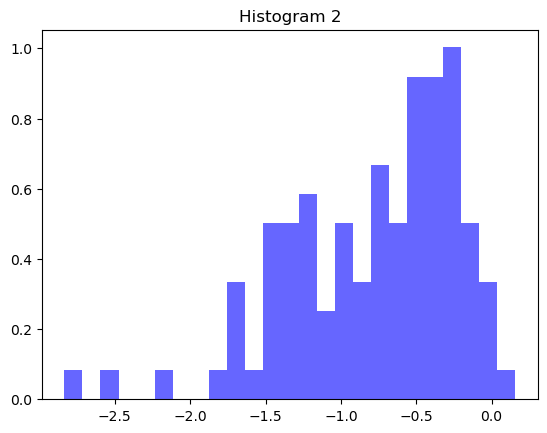

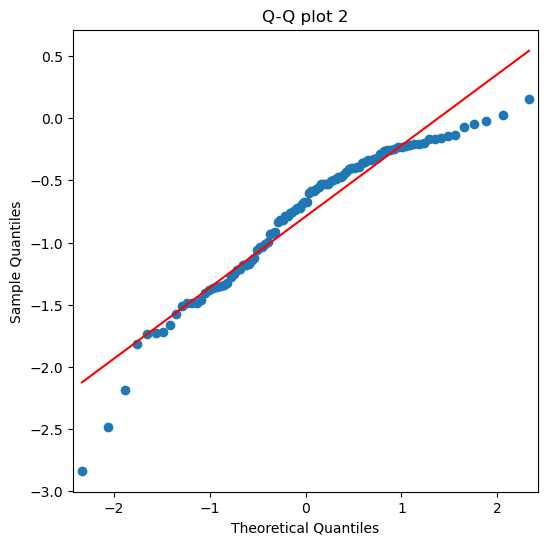

In [5]:
# Generate data for negatively skewed distribution
data = skewnorm.rvs(-10, size=100)

# Plot the histogram
plt.hist(data, bins=25, density=True, alpha=0.6, color='b') 
plt.title("Histogram 2")
plt.show()

# Q-Q plot
fig, ax = plt.subplots(figsize=(6,6))
sm.qqplot(data, line='s', ax=ax, fmt='b')
ax.set_title("Q-Q plot 2")
plt.show()

As you can see, the plot here looks rather curvy. The points deviate significantly from the red line, so we conclude that the data set is not normally distributed.

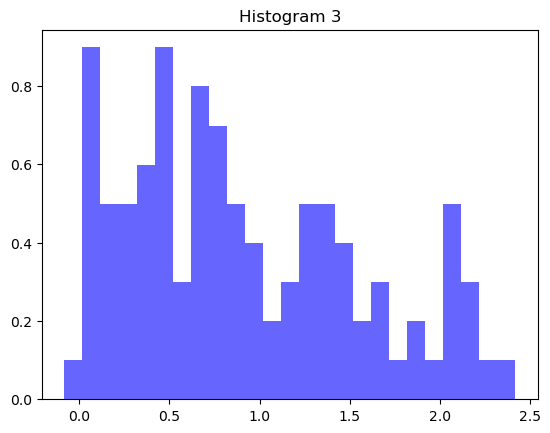

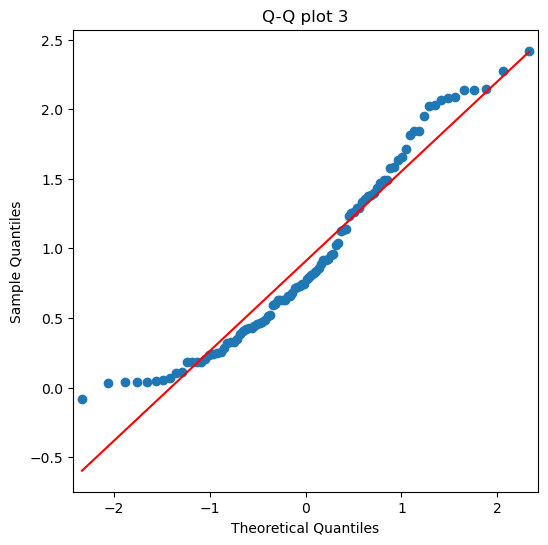

In [6]:
# Generate data for positively skewed distribution
data = skewnorm.rvs(10, size=100)

# Plot the histogram
plt.hist(data, bins=25, density=True, alpha=0.6, color='b')
plt.title("Histogram 3")
plt.show()

# Q-Q plot
fig, ax = plt.subplots(figsize=(6,6))
sm.qqplot(data, line='s', ax=ax, fmt='b')
ax.set_title("Q-Q plot 3")
plt.show()

The blue points on the curve significantly deviate from a straight line—leading us to determine that the distribution is not normal.

The Q-Q plots of skewed data visibly fail to align with the straight line indicative of normal distribution.

We'll now plot a Q-Q plot for a distribution exhibiting high kurtosis, characterized by the following:

- Light tails
- Lack of outliers
- Spread out values
- Sharp (i.e., tall and thin) curve

Kurtosis: 5.0764968372660855


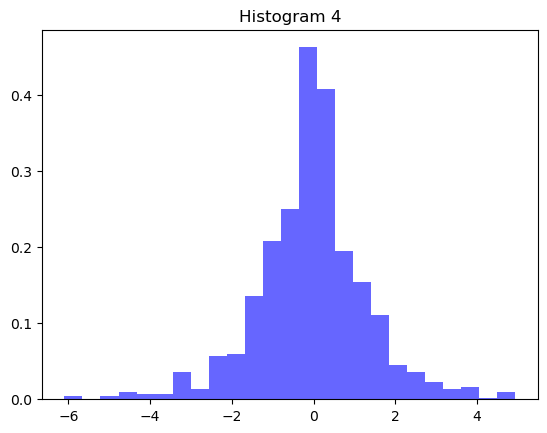

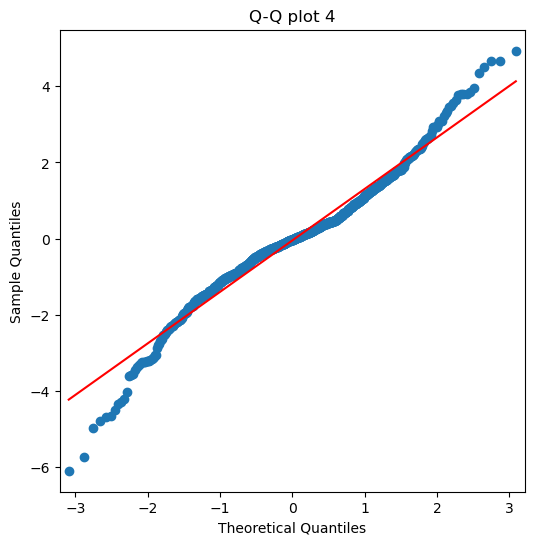

In [7]:
# Generate data for distribution with high kurtosis
loc, scale = 0., 1.
data = np.random.laplace(loc, scale, 1000)
print("Kurtosis: " + str(kurtosis(data, fisher=False)))

# Plot the histogram
plt.hist(data, bins=25, density=True, alpha=0.6, color='b')
plt.title("Histogram 4")
plt.show()

# Q-Q plot
fig, ax = plt.subplots(figsize=(6,6))
sm.qqplot(data, line='s', ax=ax, fmt='b')
ax.set_title("Q-Q plot 4")
plt.show()

When dealing with a distribution that exhibits high kurtosis, the Q-Q plot demonstrates noticeable deviations from the straight line at both ends. Despite a bell-shaped histogram potentially implying normality, the Q-Q plot provides clear evidence to the contrary—indicating that the distribution is not normal.